
# Deaths and Births

In [1]:
# Subscribe to api.insee.fr and get your credentials!
# Save your credentials with init_conn function :
# from pynsee.utils.init_conn import init_conn
# init_conn(insee_key="my_insee_key", insee_secret="my_insee_secret")

# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import clear_all_cache; clear_all_cache()"

In [1]:
from pynsee.macrodata import *

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

insee_data = get_dataset_list()

df_idbank = get_series_list("DECES-MORTALITE", "NAISSANCES-FECONDITE")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.REF_AREA == "FM") & # metropolitan France
                          (df_idbank.DEMOGRAPHIE.isin(["NAISS","DECES"]))] 

# get data
data = get_series(df_idbank.IDBANK)

!!! Existing environment variables used, instead of locally saved credentials !!!


1/1 - Getting series: 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]



Data has been cached



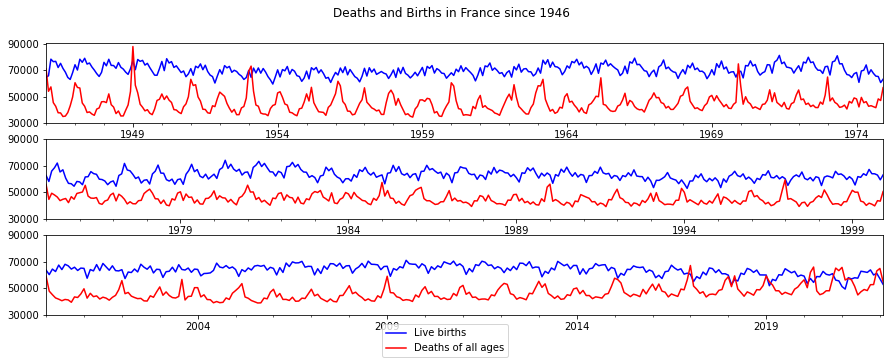

In [4]:

data['period'] = np.select([(data.DATE < '1975-01-01'),
                            (data.DATE >= '1975-01-01') & (data.DATE < '2000-01-01'),
                            (data.DATE >= '2000-01-01')],
                            ['1946 - 1974', '1975 - 1999', '2000 - today'])

conditions = [data.IDBANK=="000436391", data.IDBANK=="000436394"]
values = ["blue", "red"]
data['color'] = np.select(conditions, values)

# plot
fig, axes = plt.subplots(3,1, figsize=(15,5))
plt.suptitle("Deaths and Births in France since 1946")

for (period, group), ax in zip(data.groupby('period'), axes.flatten()):
    for (var, group2) in group.groupby(['color', 'DEMOGRAPHIE_label_en']):
        group2.plot(x='DATE', y='OBS_VALUE',
                    kind='line', ax=ax,
                    color = var[0], label = var[1],
                    legend=False).xaxis.label.set_visible(False)
        ax.set_yticks(list(range(30000,100000,20000)))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')
plt.show()